In [1]:
import os

In [2]:
os.chdir(r"C:\Users\yozhan\cryptocurrency")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from cryptocmd import CmcScraper

In [19]:
scraper = CmcScraper("BTC")
headers, data = scraper.get_data()

In [6]:
from datetime import datetime

In [7]:
start_date = datetime.strptime("01-01-2022", r"%d-%m-%Y")
end_date = datetime.strptime("31-12-2022", r"%d-%m-%Y")

In [20]:
bitcoin_price_list = []
date_list = []

for record in data:
    date = datetime.strptime(record[0], r"%d-%m-%Y")
    if(date >= start_date and date <= end_date):
        date_list.append(date)
        
        
        # Note: here we should make each price as a single-element list
        bitcoin_price_list.append([record[1]])

        
date_list.reverse()
bitcoin_price_list.reverse()

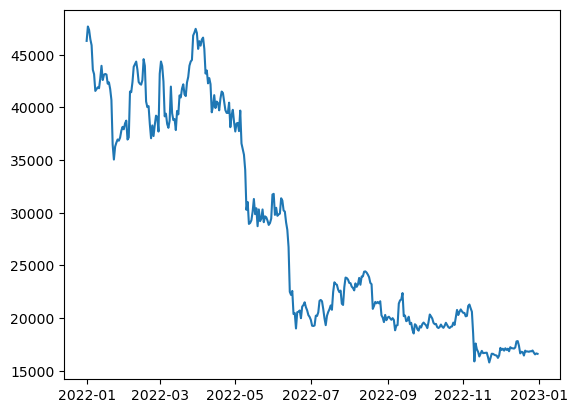

In [21]:
plt.plot(date_list, bitcoin_price_list)
plt.show()

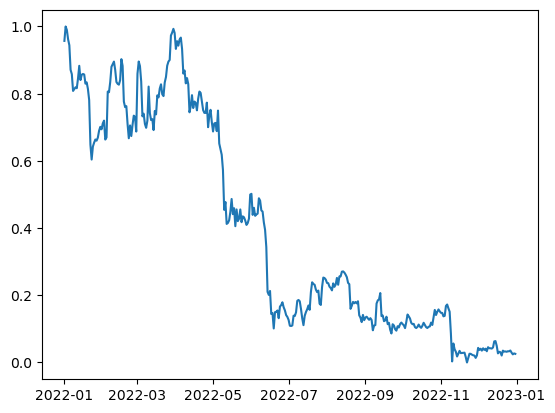

In [37]:
plt.plot(date_list, normalized)
plt.show()

In [49]:
train_size = int(len(bitcoin_price_list) * 0.75)
train, test = bitcoin_price_list[:train_size], bitcoin_price_list[train_size:]

In [50]:
import torch
 
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [52]:
lookback = 4
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# window sample, time steps, features

torch.Size([269, 4, 1]) torch.Size([269, 4, 1])
torch.Size([88, 4, 1]) torch.Size([88, 4, 1])
torch.float32


In [57]:
import torch.nn as nn
 
class CryptoModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        #input_size: how many features (currently only 1, the time series from previous days)
        #if more features are used (for example, text features, sentiment scores, then input_size should be larger)
        
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = x[:, -1:, :]
        x = self.linear(x)
        return x

In [56]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = CryptoModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:        
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch[:, -1:, :])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred[:, -1:, :], y_train[:, -1:, :]))
        
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred[:, -1:, :], y_test[:, -1:, :]))
        
        
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.

KeyboardInterrupt: 

torch.Size([269, 4, 1])
torch.Size([269, 1, 1])


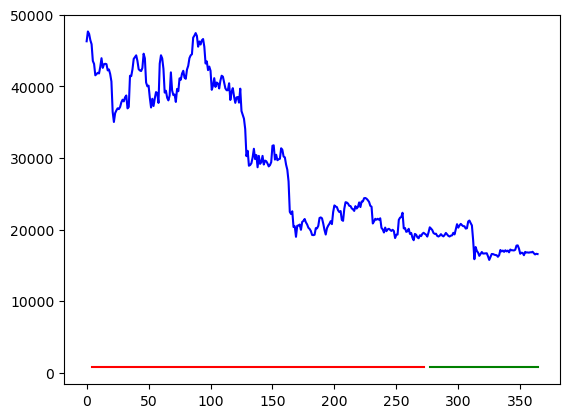

In [31]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(bitcoin_price_list) * np.nan
    y_pred = model(X_train)
    print(y_train.shape)
    print(y_pred.shape)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(bitcoin_price_list) * np.nan
    test_plot[train_size+lookback:len(bitcoin_price_list)] = model(X_test)[:, -1, :]
# plot
plt.plot(bitcoin_price_list, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(bitcoin_price_list)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
normalized = scaler.transform(bitcoin_price_list)

In [58]:
# normalized

train_size = int(len(normalized) * 0.75)
train, test = normalized[:train_size], normalized[train_size:]

In [59]:
lookback = 4
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# window sample, time steps, features

torch.Size([269, 4, 1]) torch.Size([269, 4, 1])
torch.Size([88, 4, 1]) torch.Size([88, 4, 1])


In [66]:
import torch.nn as nn
 
class CryptoModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        #input_size: how many features (currently only 1, the time series from previous days)
        #if more features are used (for example, text features, sentiment scores, then input_size should be larger)
        
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x = x.float()
        x, _ = self.lstm(x)
        x = x[:, -1:, :]
        x = self.linear(x)
        return x

In [68]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = CryptoModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:  
        
        X_batch, y_batch = X_batch.float(), y_batch.float()
        
        X_batch = X_batch.float()
        y_pred = model(X_batch)
        
        loss = loss_fn(y_pred, y_batch[:, -1:, :])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred[:, -1:, :], y_train[:, -1:, :]))
        
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred[:, -1:, :], y_test[:, -1:, :]))
        
        
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 0.2444, test RMSE 0.3855
Epoch 100: train RMSE 0.0453, test RMSE 0.0218
Epoch 200: train RMSE 0.0425, test RMSE 0.0163
Epoch 300: train RMSE 0.0351, test RMSE 0.0200
Epoch 400: train RMSE 0.0358, test RMSE 0.0250
Epoch 500: train RMSE 0.0349, test RMSE 0.0250
Epoch 600: train RMSE 0.0359, test RMSE 0.0249
Epoch 700: train RMSE 0.0358, test RMSE 0.0243
Epoch 800: train RMSE 0.0375, test RMSE 0.0242
Epoch 900: train RMSE 0.0353, test RMSE 0.0270
Epoch 1000: train RMSE 0.0349, test RMSE 0.0240
Epoch 1100: train RMSE 0.0350, test RMSE 0.0235
Epoch 1200: train RMSE 0.0373, test RMSE 0.0318
Epoch 1300: train RMSE 0.0349, test RMSE 0.0212
Epoch 1400: train RMSE 0.0353, test RMSE 0.0253
Epoch 1500: train RMSE 0.0346, test RMSE 0.0237
Epoch 1600: train RMSE 0.0364, test RMSE 0.0265
Epoch 1700: train RMSE 0.0411, test RMSE 0.0290
Epoch 1800: train RMSE 0.0346, test RMSE 0.0245
Epoch 1900: train RMSE 0.0357, test RMSE 0.0190


torch.Size([269, 4, 1])
torch.Size([269, 1, 1])


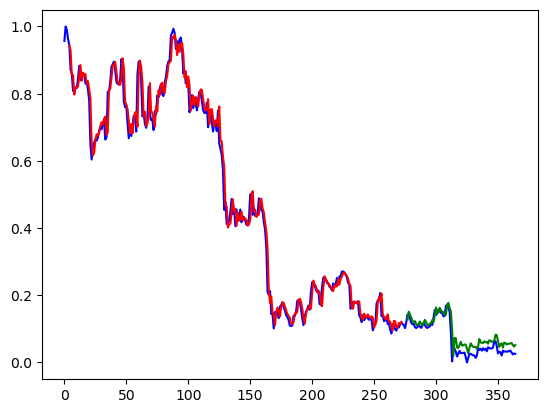

In [70]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(bitcoin_price_list) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(bitcoin_price_list) * np.nan
    test_plot[train_size+lookback:len(bitcoin_price_list)] = model(X_test)[:, -1, :]
# plot
plt.plot(normalized, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

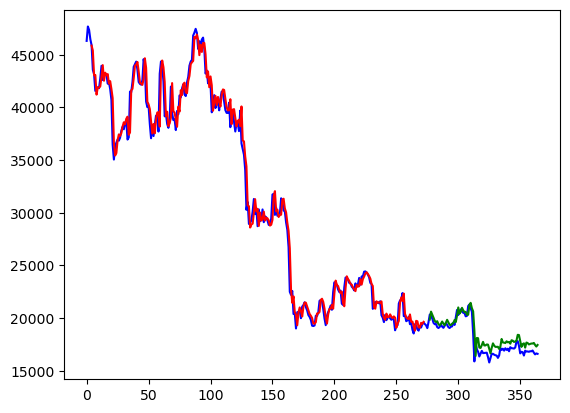

In [71]:
with torch.no_grad():
    
    # shift train predictions for plotting
    train_plot = np.ones_like(bitcoin_price_list) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_inversed = scaler.inverse_transform(model(X_train)[:, -1, :])
    train_plot[lookback:train_size] = train_inversed
    # shift test predictions for plotting
    test_plot = np.ones_like(bitcoin_price_list) * np.nan
    test_inversed = scaler.inverse_transform(model(X_test)[:, -1, :])
    test_plot[train_size+lookback:len(bitcoin_price_list)] = test_inversed

# plot
plt.plot(bitcoin_price_list, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()    

In [74]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [81]:
rmse = sqrt(mean_squared_error(bitcoin_price_list[train_size+lookback:], test_inversed))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 767.999


In [82]:
bitcoin_train, bitcoin_test = bitcoin_price_list[:train_size], bitcoin_price_list[train_size:]

In [88]:
# get previous day's opening price
# because of the lookback (currently=4), the previous price set starts from position 3

bitcoin_test_previous_price = bitcoin_test.copy()[lookback-1:][:-1]

In [90]:
bitcoin_true_label = []


bitcoin_test = bitcoin_test.copy()[lookback:]
for i, _ in enumerate(bitcoin_test):
    if(bitcoin_test[i] > bitcoin_test_previous_price[i]):
        bitcoin_true_label.append("Increase")
    else:
        bitcoin_true_label.append("Decrease")

In [92]:
bitcoin_predict_label = []
for i, _ in enumerate(test_inversed):
    if(test_inversed[i] > bitcoin_test_previous_price[i]):
        bitcoin_predict_label.append("Increase")
    else:
        bitcoin_predict_label.append("Decrease")

In [98]:
print(bitcoin_test_previous_price)
print(test_inversed)

[[19623.584689448744], [20335.899579376473], [20161.03843820979], [19957.55908041741], [19546.328837739784], [19417.479411166132], [19446.416225133773], [19138.999877483147], [19052.64578600759], [19156.96661332697], [19382.53397217804], [19185.437303811446], [19068.91355993786], [19268.562102307453], [19550.466742932043], [19335.02644145188], [19138.08505687014], [19053.203045616505], [19172.380608580974], [19207.734650775248], [19567.769580384924], [19344.96442021395], [20092.23718809519], [20772.803027102687], [20287.956094786256], [20595.103841969667], [20817.982251842404], [20633.696071095317], [20494.897622939236], [20482.959693755372], [20162.689227896553], [20208.7694981217], [21144.83146578881], [21285.056663911386], [20924.62048404909], [20600.67274715879], [18543.761249619893], [15883.15822691518], [17583.252430510052], [17036.875408441774], [16799.722291055714], [16352.028563420386], [16617.484737989726], [16884.341187944265], [16670.426756200326], [16687.911575071244], [16

In [93]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [94]:
print(classification_report(bitcoin_true_label, bitcoin_predict_label))

              precision    recall  f1-score   support

    Decrease       0.00      0.00      0.00        49
    Increase       0.44      0.97      0.60        39

    accuracy                           0.43        88
   macro avg       0.22      0.49      0.30        88
weighted avg       0.19      0.43      0.27        88

